In [3]:
import matplotlib
import matplotlib.pyplot as plt

import jax
import jax.numpy as np
from jax.random import PRNGKey

import numpyro
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS, Predictive

import pandas as pd

import covid
import covid.util as util

# Load Data and Set Parameters

In [4]:
import numpy as onp
import covid.models.SEIRD_variable_detection
import covid.models.SEIRD_incident

data = util.load_data()
place = 'NY'

I = [1000,1000]
R_t= onp.flip(onp.arange(.5,2, step=.05))
print(len(R_t))
for t in range(len(R_t)):
  lambda_t = I[t-1]
  I = I + [lambda_t*R_t[t]]
D =  np.append(np.repeat(0,10),.01*np.asarray(I[10:]))

t = pd.date_range(start='2020-03-15', periods=len(I), freq='D')
local_df = pd.DataFrame(data={'confirmed':onp.cumsum(I),
                              'death':onp.cumsum(D)})
local_df = local_df.set_index(t)
data['sim'] = {'data':local_df,'name':'sim','pop':300e6}

#util.run_place(data, 
 #              'sim', 
#               start='2020-03-15', 
  #             end='2020-04-27',
 #              T_future=8*7,
  #             model_type = covid.models.SEIRD.SEIRD,
  #             num_warmup=100, 
  #             num_samples=100)

30


/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/jax/lax/lax.py:5248: UserWarning: Explicitly requested dtype float64 requested in asarray is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  warnings.warn(msg.format(dtype, fun_name , truncated_dtype))
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/jax/lax/lax.py:5248: UserWarning: Explicitly requested dtype float64 requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  warnings.warn(msg.format(dtype, fun_name , truncated_dtype))
/usr/local/Cellar/py

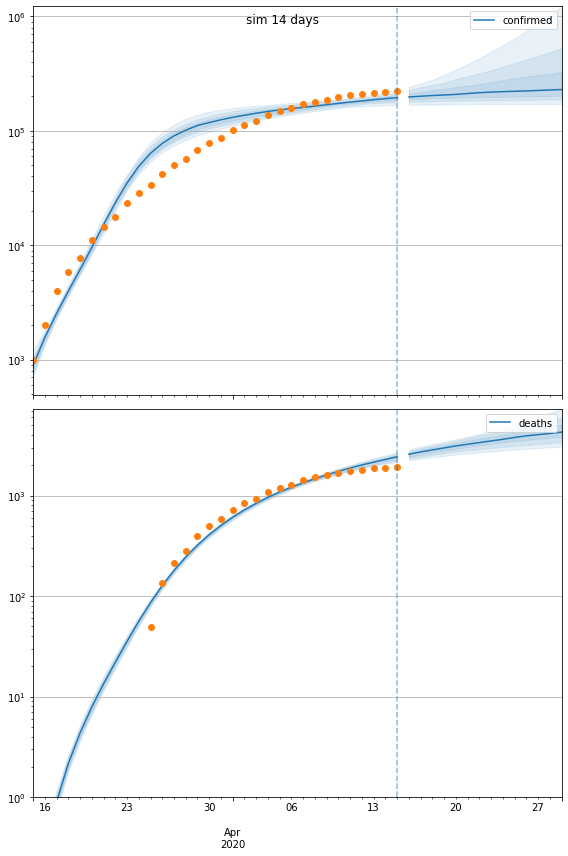

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/jax/lax/lax.py:5248: UserWarning: Explicitly requested dtype float64 requested in asarray is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  warnings.warn(msg.format(dtype, fun_name , truncated_dtype))
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/jax/lax/lax.py:5248: UserWarning: Explicitly requested dtype float64 requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  warnings.warn(msg.format(dtype, fun_name , truncated_dtype))
/usr/local/Cellar/py

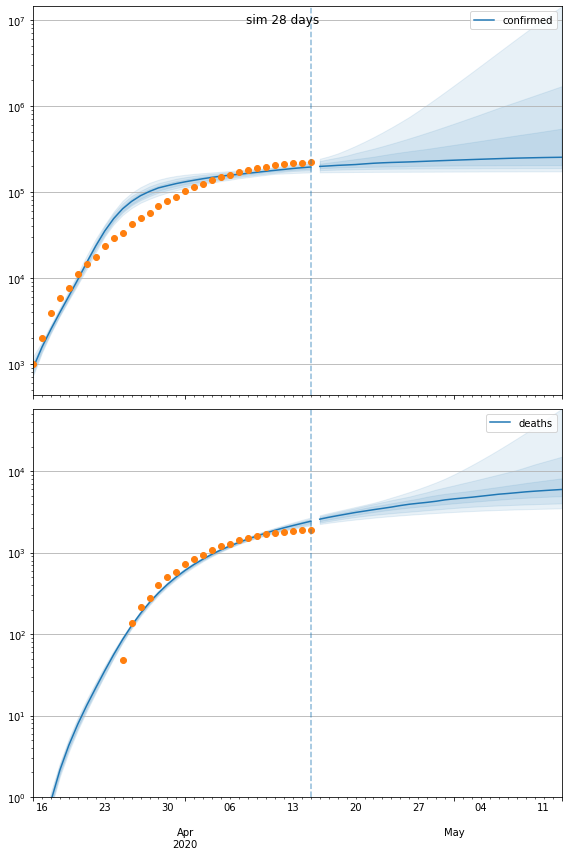

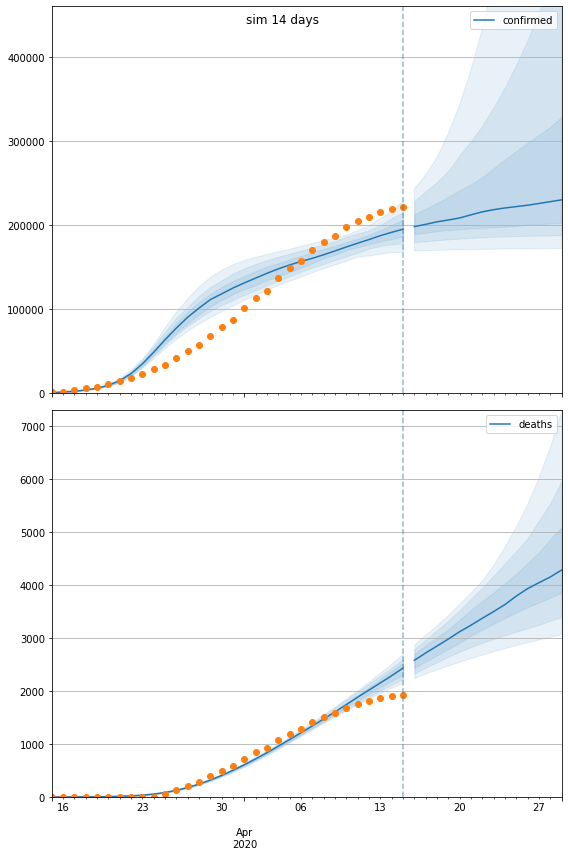

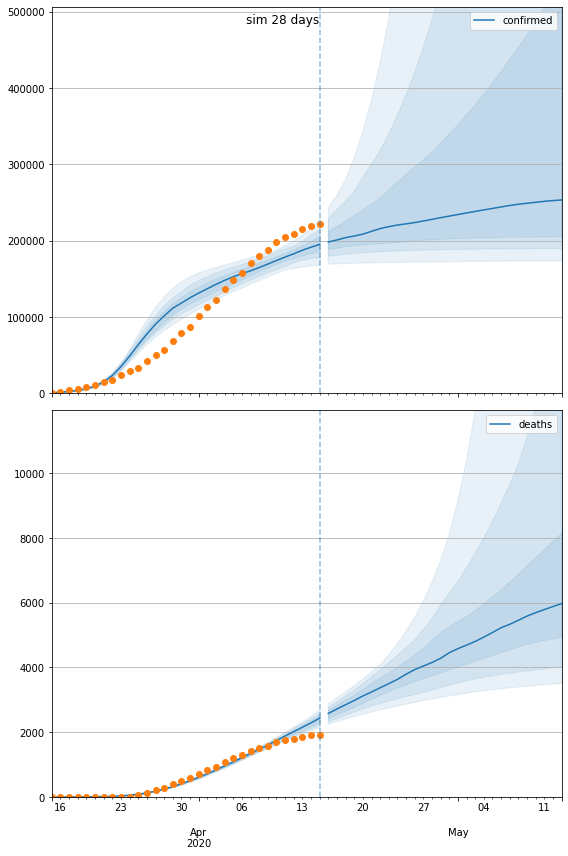

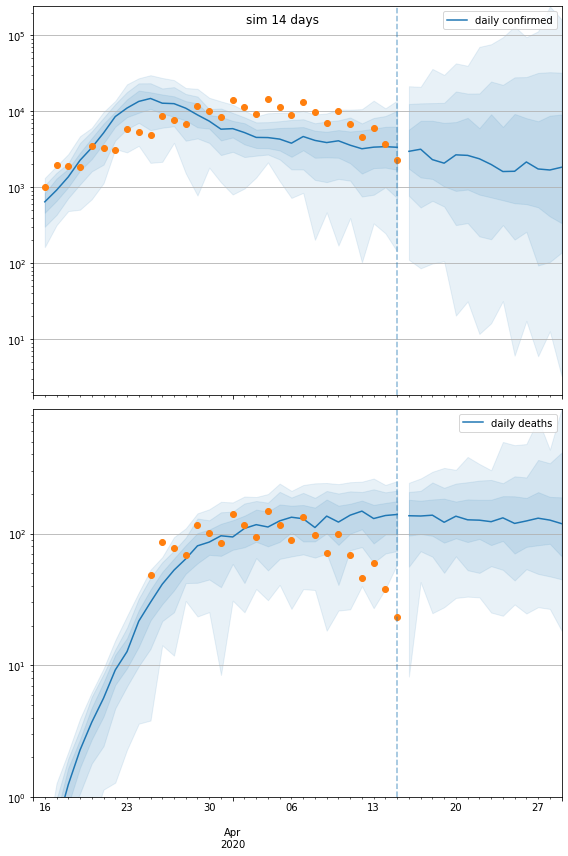

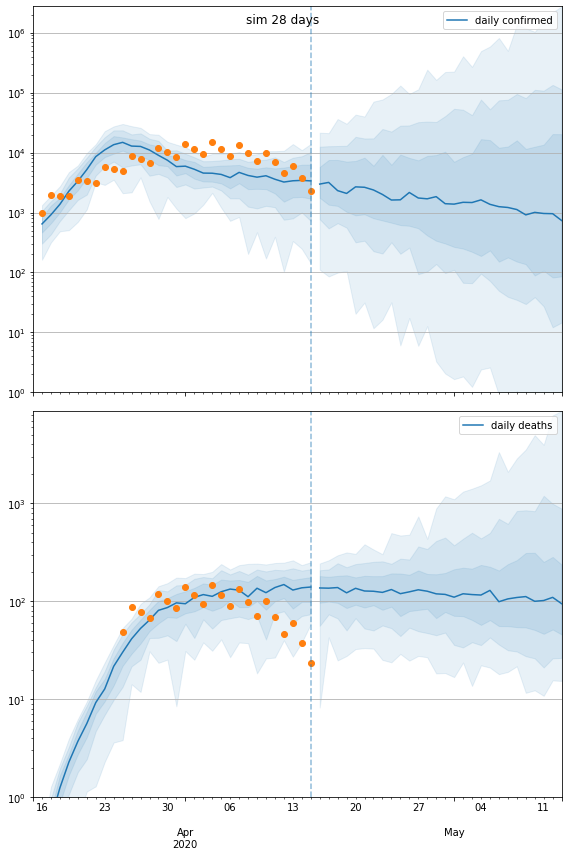

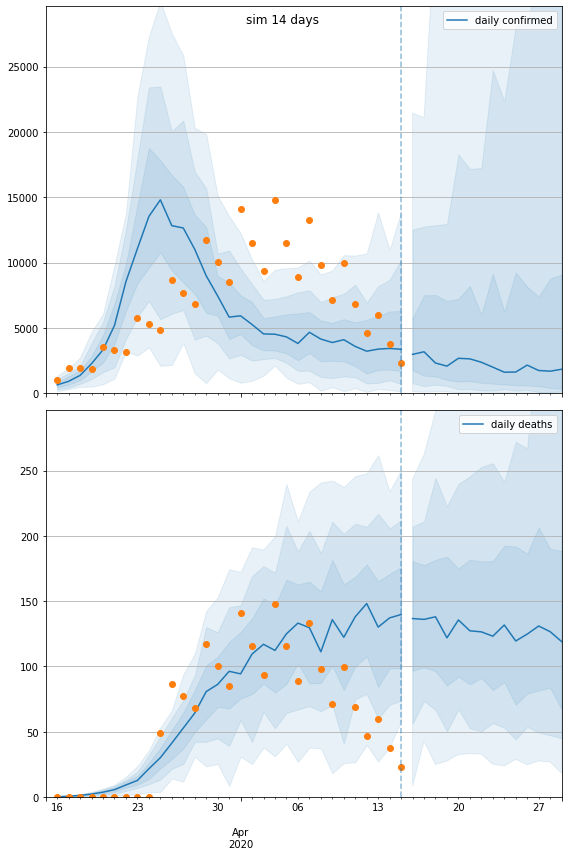

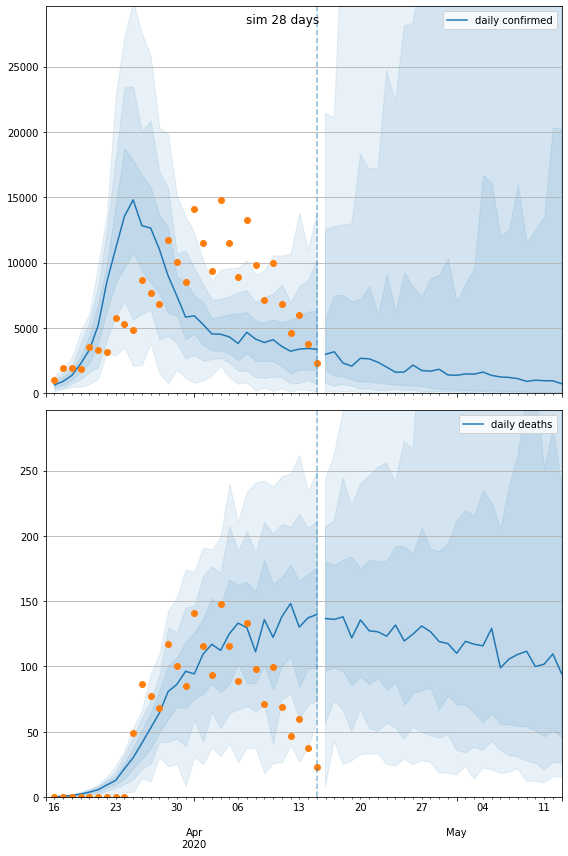

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/jax/lax/lax.py:5248: UserWarning: Explicitly requested dtype float64 requested in asarray is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  warnings.warn(msg.format(dtype, fun_name , truncated_dtype))
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/jax/lax/lax.py:5248: UserWarning: Explicitly requested dtype float64 requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  warnings.warn(msg.format(dtype, fun_name , truncated_dtype))


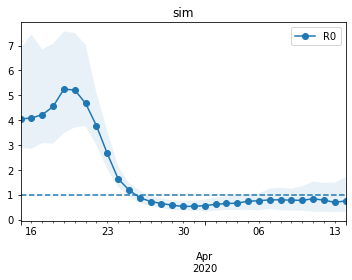

In [5]:
data['sim'] = {'data':local_df,'name':'sim','pop':300e6}

place = 'sim'
util.gen_forecasts(data, 
                   place, 
                   start = '2020-03-15',
                   model_abrv = "SEIRD",
                   model_type=covid.models.SEIRD.SEIRD)

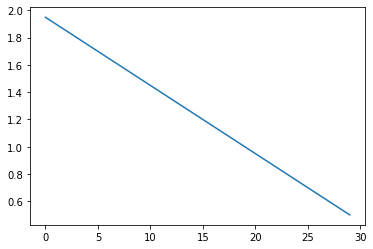

In [14]:
plt.plot(R_t)
plt.show()

3383.4000651041665
486.171875


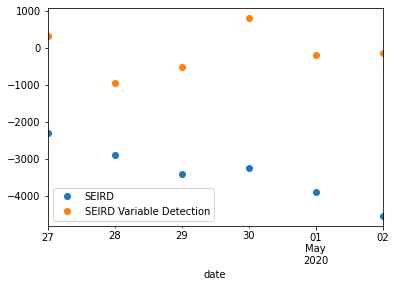

In [7]:
import covid.util as util
import covid.models.SEIRD_variable_detection

data = util.load_data()

## Validation: can only do cumulative for now...
start_eval = '2020-04-27'
_,m1_mae = util.score_forecats(start=start_eval,place='NY',data=data)

print (m1_mae)

err_plotm2,m2_mae = util.score_forecats(start=start_eval,place='NY',data=data,
                            model_abrv="SEIRD_variable_detection",
                             model=covid.models.SEIRD_variable_detection.SEIRD())

print (m2_mae)
plt.legend(["SEIRD","SEIRD Variable Detection"])
plt.show()
#plt.title(f"{place} MAE={mae:.2f}")
#plt.show()

